In [11]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import wilcoxon
import math
import tifffile as tf
from statsmodels.stats.multitest import multipletests
thresh = np.arange(0,1,0.02)
the_thresh = 0.8

In [12]:
br_index = np.array([64,65,66,55,72,73,74,63,23])
br_name = np.array(['MBPED_L','MBVL_L','MBML_L','LH_L','SLP_L','SIP_L','SMP_L','CRE_L','EB'])
result_path = '../results/nsyb-G7f-rAch1h'
sub_path_2 = 'each_region_L-DEEPCAD-formal'
filename = 'accuracy' # accuracy / accuracy_svm / AUC_weighted / f1_weighted
if_save = True
fly_selected_1 = [0,1,2,3,4,5,6,7,8,9]
LH_yes_ach = [0,1,2,3,5,6,7,8,9]
num_fly = len(fly_selected_1)
figure_save_path = '../../figures-revision-1'
folder = os.path.exists(figure_save_path)
if not folder:
    os.makedirs(figure_save_path)
file_folders = os.listdir(result_path)
# read each region
data_2 = []
for i in range(num_fly):
    the_path = result_path + '/' + file_folders[fly_selected_1[i]] + '/' + sub_path_2 + '/' + 'list_' + filename + '_each_region.npy'
    folder = os.path.exists(the_path)
    if not folder:
        continue
    a = np.load(the_path)
    print(np.shape(a))
    a = np.squeeze(a)
    data_2.append(a)
data_2 = np.array(data_2)
print(np.shape(data_2))
# threshold
data_2 = np.squeeze(data_2[:,:,0,:,:,:,:])
max_data_2 = np.mean(data_2,4)
max_data_2 = np.squeeze(max_data_2[:,:,:,thresh==the_thresh,:])
print(np.shape(max_data_2))
data_save = max_data_2[:,:,:,0]
data_save = data_save*100
data_save_1 = data_save[:,range(3),:]
print(np.shape(data_save_1))

(3, 4, 9, 50, 5, 2)
(3, 4, 9, 50, 5, 2)
(3, 4, 9, 50, 5, 2)
(3, 4, 9, 50, 5, 2)
(3, 4, 9, 50, 5, 2)
(3, 4, 9, 50, 5, 2)
(3, 4, 9, 50, 5, 2)
(3, 4, 9, 50, 5, 2)
(3, 4, 9, 50, 5, 2)
(3, 4, 9, 50, 5, 2)
(10, 3, 4, 9, 50, 5, 2)
(10, 3, 9, 2)
(10, 3, 9)


In [13]:
result_path = '../results/nsyb-G7f-r5HT1.0'
sub_path_2 = 'each_region_L-DEEPCAD-formal'
filename = 'accuracy' # accuracy / accuracy_svm / AUC_weighted / f1_weighted
fly_selected_2 = [0,1,2,3,4,5,6,7,8,9]
LH_yes_5ht = [0,1,2,3,4,5,6,8,9]
num_fly = len(fly_selected_2)
file_folders = os.listdir(result_path)
# read each region
data_2 = []
for i in range(num_fly):
    the_path = result_path + '/' + file_folders[fly_selected_2[i]] + '/' + sub_path_2 + '/' + 'list_' + filename + '_each_region.npy'
    folder = os.path.exists(the_path)
    if not folder:
        continue
    a = np.load(the_path)
    a = np.squeeze(a)
    data_2.append(a)
data_2 = np.array(data_2)
np.shape(data_2)
# threshold
data_2 = np.squeeze(data_2[:,:,0,:,:,:,:])
max_data_2 = np.mean(data_2,4)
max_data_2 = np.squeeze(max_data_2[:,:,:,thresh==the_thresh,:])
np.shape(max_data_2)
data_save = max_data_2[:,:,:,0]
data_save = data_save*100
data_save_2 = data_save[:,range(3),:]
print(np.shape(data_save_2))

(10, 3, 9)


In [14]:
# Atlas
atlas_path = '../../data/20230420-nsyb-G7f-rAch1h/fly2/align_to_atlas/atlas_8bit.tiff'
# load atlas
atlas= tf.imread(atlas_path)
atlas = np.transpose(atlas,[1,2,0])
print('load atlas done! size:')
print(np.shape(atlas))

load atlas done! size:
(512, 512, 218)


[0.02273396 0.00585938 0.16015625]
[0.08398438 0.00878906 0.00878906]
[0.15820312 0.00585938 0.32226562]
[0.3196837  0.05859375 0.375     ]
[0.00292969 0.00390625 0.00292969]
[0.76953125 0.01171875 0.07324219]
[0.01953125 0.00585938 0.00585938]
[0.09765625 0.00585938 0.00585938]
[0.00390625 0.00292969 0.00292969]
[0.00976562 0.00292969 0.00292969]
[0.00585938 0.00585938 0.4921875 ]
[0.84570312 0.01171875 0.25960638]
[1.         0.00585938 0.12597656]
[0.32226562 0.02929688 0.05566406]
[0.00292969 0.00292969 0.06445312]
[0.375      0.00585938 0.01464844]
[0.00878906 0.00878906 0.00976562]
[0.23242188 0.00585938 0.00585938]


C:\Users\GTH\AppData\Local\Temp\ipykernel_45380\1918639927.py:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


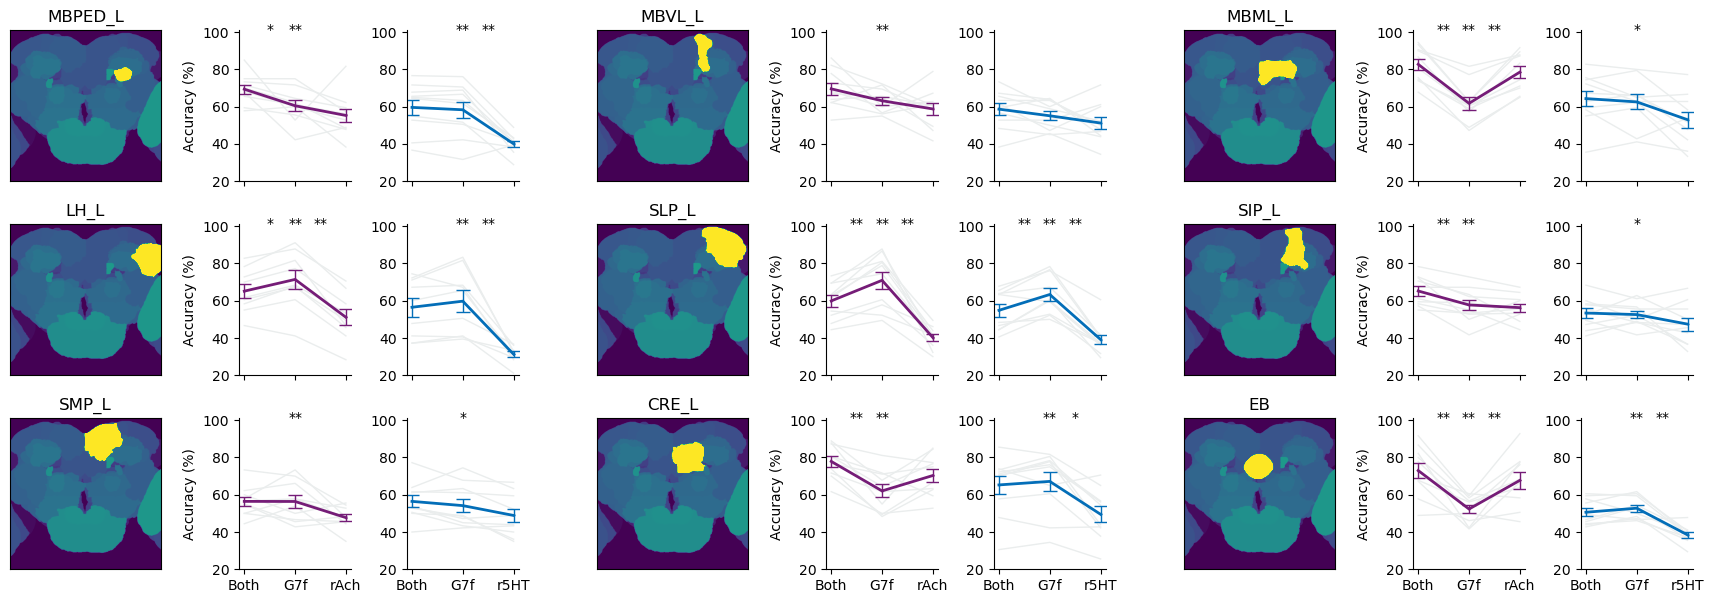

In [15]:
plt.figure(figsize = (22,7))
grid = plt.GridSpec(9,21, wspace=2, hspace=2)
for i in range(len(br_name)):
    # Atlas
    atlas_flag = atlas.copy()
    atlas_flag[atlas==br_index[i]] = 200
    atlas_flag[atlas_flag>=55] = atlas_flag[atlas_flag>=55] - 48
    plt.subplot(grid[int(i/3)*3:int(i/3)*3+3,(i%3)*7:(i%3)*7+3])
    plt.imshow(np.max(atlas_flag,2),vmin = 0,vmax = 100)
    plt.title(br_name[i])
    plt.xticks([]),plt.yticks([])

    # Ach
    ax = plt.subplot(grid[int(i/3)*3:int(i/3)*3+3,(i%3)*7+3:(i%3)*7+5])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    a = data_save_1[:,:,i]
    if i == 3:
        a = a[LH_yes_ach,:]
    the_mean = np.mean(a,0)
    the_std = np.std(a,0,ddof = 1)/math.sqrt(np.size(a,0))
    for j in range(np.size(a,0)):
        plt.plot(a[j,:],color='#EAEDED', linewidth=1,alpha = 1)
    plt.errorbar(range(np.size(data_save_1,1)),the_mean,yerr=the_std,ecolor='#751C77',elinewidth=1,marker='.',mfc='#751C77',\
	mec='#751C77',mew=1,ms=1,alpha=1,capsize=5,capthick=3,color='#751C77', linewidth=2)
    
    plt.ylim((20,101))
    if int(i/3)==2:
        plt.xticks([0,1,2],['Both','G7f','rAch'])
    else:
        plt.xticks([0,1,2],['','',''])
    flag = np.size(a,1)
    p_list = []
    for j in range(1,flag):
        res = wilcoxon(a[:,0],a[:,j])
        p = res.pvalue
        p_list.append(p)
    # two channel compare
    res = wilcoxon(a[:,1],a[:,2])
    p = res.pvalue
    p_list.append(p)
    p_corrected = multipletests(p_list,method = 'fdr_bh')
    p_list = p_corrected[1]
    print(p_list)
    for j in range(flag):
        p = p_list[j]
        if p<0.05 and p>=0.01:
            plt.text(j*0.5+0.5,101,'*',verticalalignment = 'center', horizontalalignment = 'center')
        elif p<0.01 and p>0.001:
            plt.text(j*0.5+0.5,101,'**',verticalalignment = 'center', horizontalalignment = 'center')
        elif p<0.001 and p>=0.0001:
            plt.text(j*0.5+0.5,101,'***',verticalalignment = 'center', horizontalalignment = 'center') 
        elif p<0.0001:
            plt.text(j*0.5+0.5,101,'****',verticalalignment = 'center', horizontalalignment = 'center') 
    plt.ylabel('Accuracy (%)')
    # 5HT
    ax = plt.subplot(grid[int(i/3)*3:int(i/3)*3+3,(i%3)*7+5:(i%3)*7+7])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    a = data_save_2[:,:,i]
    if i == 3:
        a = a[LH_yes_5ht,:]
    the_mean = np.mean(a,0)
    the_std = np.std(a,0,ddof = 1)/math.sqrt(np.size(a,0))
    for j in range(np.size(a,0)):
        plt.plot(a[j,:],color='#EAEDED', linewidth=1,alpha = 1)
    plt.errorbar(range(np.size(data_save_2,1)),the_mean,yerr=the_std,ecolor='#036EB8',elinewidth=1,marker='.',mfc='#036EB8',\
	mec='#036EB8',mew=1,ms=1,alpha=1,capsize=5,capthick=3,color='#036EB8', linewidth=2)
    
    plt.ylim((20,101))
    if int(i/3)==2:
        plt.xticks(np.linspace(0,2,3),['Both','G7f','r5HT'])
    else:
        plt.xticks(np.linspace(0,2,3),['','',''])
    flag = np.size(a,1)
    p_list = []
    for j in range(1,flag):
        res = wilcoxon(a[:,0],a[:,j])
        p = res.pvalue
        p_list.append(p)
    # two channel compare
    res = wilcoxon(a[:,1],a[:,2])
    p = res.pvalue
    p_list.append(p)
    p_corrected = multipletests(p_list,method = 'fdr_bh')
    p_list = p_corrected[1]
    print(p_list)
    for j in range(flag):
        p = p_list[j]
        if p<0.05 and p>=0.01:
            plt.text(j*0.5+0.5,101,'*',verticalalignment = 'center', horizontalalignment = 'center')
        elif p<0.01 and p>0.001:
            plt.text(j*0.5+0.5,101,'**',verticalalignment = 'center', horizontalalignment = 'center')
        elif p<0.001 and p>=0.0001:
            plt.text(j*0.5+0.5,101,'***',verticalalignment = 'center', horizontalalignment = 'center') 
        elif p<0.0001:
            plt.text(j*0.5+0.5,101,'****',verticalalignment = 'center', horizontalalignment = 'center') 
    plt.ylabel('')


plt.tight_layout()
if if_save:
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.savefig(figure_save_path + '/' + 's5d'+ filename +'_channel_compare'+'-hor.pdf',dpi = 300,bbox_inches = 'tight')
    plt.savefig(figure_save_path + '/' + 's5d'+ filename +'_channel_compare'+'-hor.png',dpi = 300,bbox_inches = 'tight')
plt.show()